In [17]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [21]:
real_mf_50 = sio.loadmat('data/mfwno_darcy_n50.mat')['real_mf'] 
output_mf_wno_50 = sio.loadmat('data/mfwno_darcy_n50.mat')['output_mf'] 
output_hf_wno_50 = sio.loadmat('data/mfwno_darcy_n50.mat')['pred_hf'] 
output_mf_deeponet_50 = sio.loadmat('data/deeponet_darcy_n50.mat')['out_actual'] 


In [11]:
case = [10, 20, 30, 50]
for n in case:
    output_mf_deeponet = sio.loadmat('data/deeponet_darcy_n' + str(n) + '.mat')['out_actual'] 

    error = (output_mf_deeponet - real_mf_50)**2
    error_mean = np.mean(error)
    error_std = np.std(error)

    print('Case-{}, MSE: mean-{:0.6f}, std-{:0.6f}'.format(str(n), error_mean, error_std))


Case-10, MSE: mean-0.003325, std-0.031198
Case-20, MSE: mean-0.003253, std-0.031299
Case-30, MSE: mean-0.003254, std-0.031300
Case-50, MSE: mean-0.003253, std-0.031297


In [12]:
print(real_mf_50.shape, output_mf_wno_50.shape, output_hf_wno_50.shape, output_mf_deeponet_50.shape)


(2000, 51, 51) (2000, 51, 51) (2000, 51, 51) (2000, 51, 51)


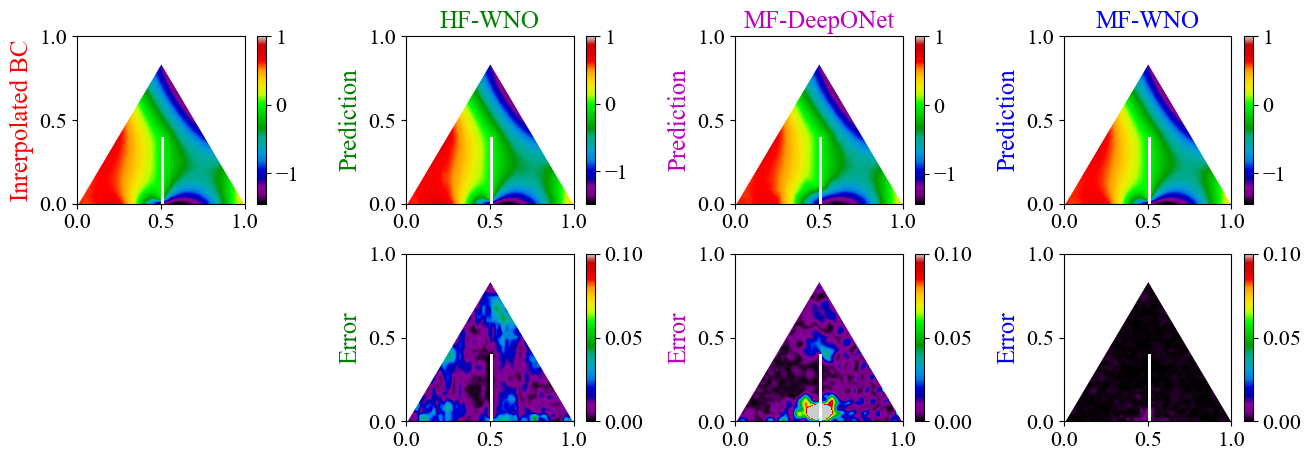

In [40]:
s = 1
xmax = s
ymax = s-8/51

plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams['font.size'] = 16
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

figure1, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 5), dpi=100)
plt.subplots_adjust(hspace=0.30, wspace=0.30)

value = 500

im = ax[0,0].imshow(real_mf_50[value, ...], origin='lower', extent=[0,1,0,1], interpolation='Gaussian', cmap='nipy_spectral', vmax=1)
xf = np.array([0., xmax/2]); yf = xf*(ymax/(xmax/2)); 
ax[0,0].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([xmax/2, xmax]); yf = (xf-xmax)*(ymax/((xmax/2)-xmax)); 
ax[0,0].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([0, xmax]); 
ax[0,index].fill_between(xf, ymax, s, color = [1, 1, 1])        
ax[0,0].add_patch(Rectangle((0.5,0),0.02,0.4, facecolor='white'))
plt.colorbar(im, ax=ax[0,0], fraction=0.2)
ax[0,0].set_ylabel('Inrerpolated BC', color='r', fontsize=18)

ax[1,0].set_axis_off()

im = ax[0,1].imshow(output_hf_wno_50[value, ...], origin='lower', extent=[0,1,0,1], interpolation='Gaussian', cmap='nipy_spectral', vmax=1)
xf = np.array([0., xmax/2]); yf = xf*(ymax/(xmax/2)); 
ax[0,1].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([xmax/2, xmax]); yf = (xf-xmax)*(ymax/((xmax/2)-xmax)); 
ax[0,1].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([0, xmax]); 
ax[0,1].fill_between(xf, ymax, s, color = [1, 1, 1])        
ax[0,1].add_patch(Rectangle((0.5,0),0.02,0.4, facecolor='white'))
plt.colorbar(im, ax=ax[0,1], fraction=0.2)
ax[0,1].set_ylabel('Prediction', color='green', fontsize=18)
ax[0,1].set_title('HF-WNO', color='green', fontsize=18)

im = ax[1,1].imshow(np.abs(real_mf_50[value, ...] - output_hf_wno_50[value, ...]), origin='lower',
                   extent=[0,1,0,1], interpolation='Gaussian', cmap='nipy_spectral', vmin=0, vmax=0.1)
xf = np.array([0., xmax/2]); yf = xf*(ymax/(xmax/2)); 
ax[1,1].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([xmax/2, xmax]); yf = (xf-xmax)*(ymax/((xmax/2)-xmax)); 
ax[1,1].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([0, xmax]); 
ax[1,1].fill_between(xf, ymax, s, color = [1, 1, 1])        
ax[1,1].add_patch(Rectangle((0.5,0),0.02,0.4, facecolor='white'))
plt.colorbar(im, ax=ax[1,1], fraction=0.2)
ax[1,1].set_ylabel('Error', color='green', fontsize=18)

im = ax[0,2].imshow(output_mf_deeponet_50[value, ...], origin='lower', extent=[0,1,0,1], interpolation='Gaussian', cmap='nipy_spectral', vmax=1)
xf = np.array([0., xmax/2]); yf = xf*(ymax/(xmax/2)); 
ax[0,2].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([xmax/2, xmax]); yf = (xf-xmax)*(ymax/((xmax/2)-xmax)); 
ax[0,2].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([0, xmax]); 
ax[0,2].fill_between(xf, ymax, s, color = [1, 1, 1])        
ax[0,2].add_patch(Rectangle((0.5,0),0.02,0.4, facecolor='white'))
plt.colorbar(im, ax=ax[0,2], fraction=0.2)
ax[0,2].set_ylabel('Prediction', color='m', fontsize=18)
ax[0,2].set_title('MF-DeepONet', color='m', fontsize=18)

im = ax[1,2].imshow(np.abs(real_mf_50[value, ...] - output_mf_deeponet_50[value, ...]), origin='lower',
                   extent=[0,1,0,1], interpolation='Gaussian', cmap='nipy_spectral', vmin=0, vmax=0.1)
xf = np.array([0., xmax/2]); yf = xf*(ymax/(xmax/2)); 
ax[1,2].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([xmax/2, xmax]); yf = (xf-xmax)*(ymax/((xmax/2)-xmax)); 
ax[1,2].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([0, xmax]); 
ax[1,2].fill_between(xf, ymax, s, color = [1, 1, 1])        
ax[1,2].add_patch(Rectangle((0.5,0),0.02,0.4, facecolor='white'))
plt.colorbar(im, ax=ax[1,2], fraction=0.2)
ax[1,2].set_ylabel('Error', color='m', fontsize=18)

im = ax[0,3].imshow(output_mf_wno_50[value, ...], origin='lower', extent=[0,1,0,1], interpolation='Gaussian', cmap='nipy_spectral', vmax=1)
xf = np.array([0., xmax/2]); yf = xf*(ymax/(xmax/2)); 
ax[0,3].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([xmax/2, xmax]); yf = (xf-xmax)*(ymax/((xmax/2)-xmax)); 
ax[0,3].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([0, xmax]); 
ax[0,3].fill_between(xf, ymax, s, color = [1, 1, 1])        
ax[0,3].add_patch(Rectangle((0.5,0),0.02,0.4, facecolor='white'))
plt.colorbar(im, ax=ax[0,3], fraction=0.2)
ax[0,3].set_ylabel('Prediction', color='blue', fontsize=18)
ax[0,3].set_title('MF-WNO', color='blue', fontsize=18)

im = ax[1,3].imshow(np.abs(real_mf_50[value, ...] - output_mf_wno_50[value, ...]), origin='lower',
                   extent=[0,1,0,1], interpolation='Gaussian', cmap='nipy_spectral', vmin=0, vmax=0.1)
xf = np.array([0., xmax/2]); yf = xf*(ymax/(xmax/2)); 
ax[1,3].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([xmax/2, xmax]); yf = (xf-xmax)*(ymax/((xmax/2)-xmax)); 
ax[1,3].fill_between(xf, yf, ymax, color = [1, 1, 1])
xf = np.array([0, xmax]); 
ax[1,3].fill_between(xf, ymax, s, color = [1, 1, 1])        
ax[1,3].add_patch(Rectangle((0.5,0),0.02,0.4, facecolor='white'))
plt.colorbar(im, ax=ax[1,3], fraction=0.2)
ax[1,3].set_ylabel('Error', color='blue', fontsize=18)
plt.show()

figure1.savefig('Prediction_Darcy.pdf', format='pdf', dpi=300, bbox_inches='tight')  
